# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = './train.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.
import numpy as np

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train.shape[1:4]

# TODO: how many classes are in the dataset
n_classes = np.max(y_train) + 1  

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


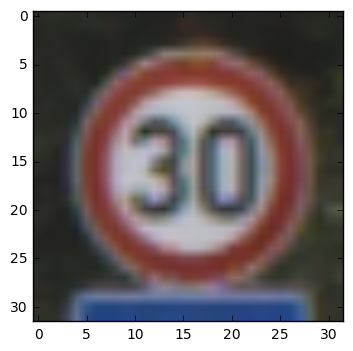

1


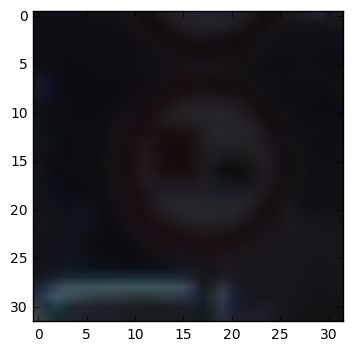

10


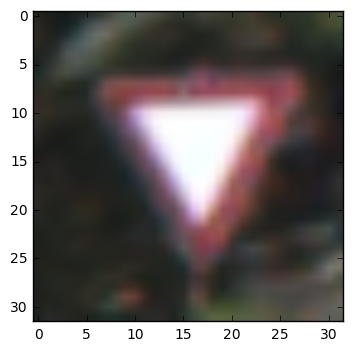

13


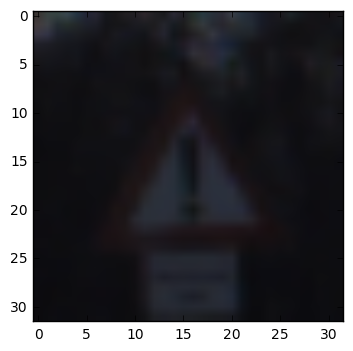

18


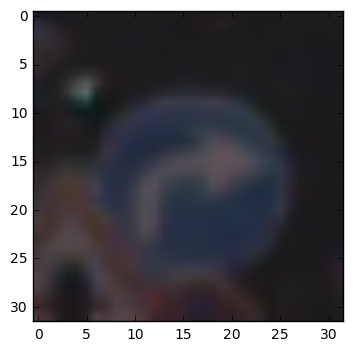

33


In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
%matplotlib inline

# Lets start by plotting one of the signs
plt.imshow(X_train[500,:,:,:])
plt.show()
print(y_train[500])

plt.imshow(X_train[15000,:,:,:])
plt.show()
print(y_train[15000])

plt.imshow(X_train[21000,:,:,:])
plt.show()
print(y_train[21000])

plt.imshow(X_train[25600,:,:,:])
plt.show()
print(y_train[25600])

plt.imshow(X_train[33100,:,:,:])
plt.show()
print(y_train[33100])

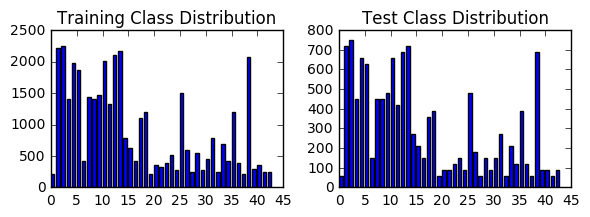

In [4]:
# Lets look at the distribution of items
# Lets see how many of each sequence of digits there are
y_train_list = np.ndarray.tolist(y_train)
train_nums = []
for i in range(0,n_classes):
    #print("Number of train items with {} digit(s): {}".format(i, y_train_list.count(i)))
    train_nums.append(y_train_list.count(i))

y_test_list = np.ndarray.tolist(y_test) 
test_nums = []
for i in range(0,n_classes):
    #print("Number of test items with {} digit(s): {}".format(i, y_test_list.count(i)))
    test_nums.append(y_test_list.count(i))
    
N = len(train_nums)
x = range(N)
width = 1/1.5
train_plot = plt.subplot(221)
train_plot.set_title("Training Class Distribution")
train_plot.bar(x, train_nums, width, color="blue")

N = len(test_nums)
x = range(N)
test_plot = plt.subplot(222)
test_plot.set_title("Test Class Distribution")
test_plot.bar(x, test_nums, width, color="blue")

plt.tight_layout()
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

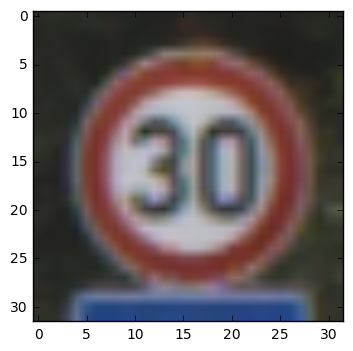

1


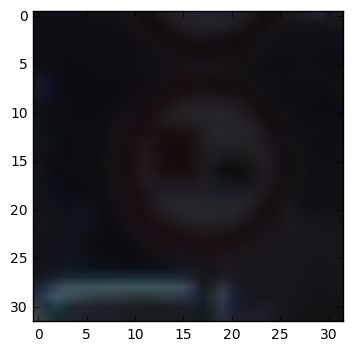

10


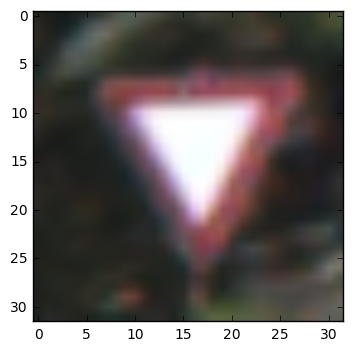

13


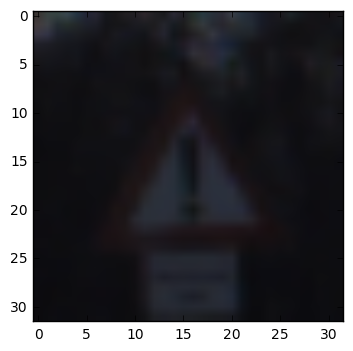

18


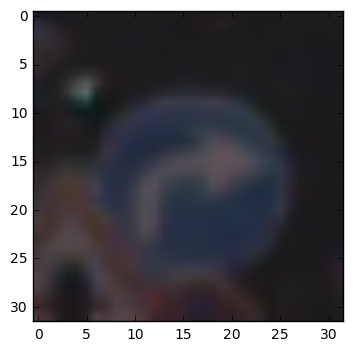

33


In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2

def normalize_data(X):
    X_min = np.min(X)
    X_max = np.max(X)
    X_norm = (X-X_min)/(X_max-X_min)
    return X_norm 

X_train = normalize_data(X_train)
X_test = normalize_data(X_test)

# Let's convert the images to grayscale and mean normalize
X_train_inputList = []
for color_image in X_train:
    #gray_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)
    avg_red_pix_rows = np.mean(color_image[:,:,0], axis=0)
    avg_red_pix_val = int(np.mean(avg_red_pix_rows, axis=0))
    avg_green_pix_rows = np.mean(color_image[:,:,1], axis=0)
    avg_green_pix_val = int(np.mean(avg_green_pix_rows, axis=0))
    avg_blue_pix_rows = np.mean(color_image[:,:,2], axis=0)
    avg_blue_pix_val = int(np.mean(avg_blue_pix_rows, axis=0))
    color_image[:,:,0] -= avg_red_pix_val
    color_image[:,:,1] -= avg_green_pix_val
    color_image[:,:,2] -= avg_blue_pix_val
    X_train_inputList.append(color_image)
X_train_inputs = np.array(X_train_inputList)

X_test_inputList = []
for color_image in X_test:
    #gray_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)
    avg_red_pix_rows = np.mean(color_image[:,:,0], axis=0)
    avg_red_pix_val = int(np.mean(avg_red_pix_rows, axis=0))
    avg_green_pix_rows = np.mean(color_image[:,:,1], axis=0)
    avg_green_pix_val = int(np.mean(avg_green_pix_rows, axis=0))
    avg_blue_pix_rows = np.mean(color_image[:,:,2], axis=0)
    avg_blue_pix_val = int(np.mean(avg_blue_pix_rows, axis=0))
    color_image[:,:,0] -= avg_red_pix_val
    color_image[:,:,1] -= avg_green_pix_val
    color_image[:,:,2] -= avg_blue_pix_val
    X_test_inputList.append(color_image)
X_test_inputs = np.array(X_test_inputList)
    
# Lets look at a sign now after pre-processing
#plt.imshow(X_train_inputs[100,:,:], cmap=plt.cm.binary)
plt.imshow(X_train_inputs[500,:,:,:])
plt.show()
print(y_train[500])

plt.imshow(X_train_inputs[15000,:,:,:])
plt.show()
print(y_train[15000])

plt.imshow(X_train_inputs[21000,:,:,:])
plt.show()
print(y_train[21000])

plt.imshow(X_train_inputs[25600,:,:,:])
plt.show()
print(y_train[25600])

plt.imshow(X_train_inputs[33100,:,:,:])
plt.show()
print(y_train[33100])

In [6]:
X_train_inputs[1]

array([[[ 0.27058824,  0.28627451,  0.28627451],
        [ 0.29411765,  0.30588235,  0.30588235],
        [ 0.29411765,  0.30196078,  0.30196078],
        ..., 
        [ 0.29411765,  0.31372549,  0.30980392],
        [ 0.2745098 ,  0.29803922,  0.29803922],
        [ 0.25882353,  0.26666667,  0.2745098 ]],

       [[ 0.25490196,  0.27058824,  0.27058824],
        [ 0.28627451,  0.29803922,  0.29803922],
        [ 0.32156863,  0.32156863,  0.31764706],
        ..., 
        [ 0.3372549 ,  0.32156863,  0.34117647],
        [ 0.28627451,  0.30588235,  0.32156863],
        [ 0.2627451 ,  0.27058824,  0.28627451]],

       [[ 0.24705882,  0.26666667,  0.26666667],
        [ 0.27843137,  0.28235294,  0.28235294],
        [ 0.31372549,  0.30588235,  0.30196078],
        ..., 
        [ 0.38431373,  0.32941176,  0.34901961],
        [ 0.27843137,  0.29411765,  0.29803922],
        [ 0.26666667,  0.27843137,  0.27058824]],

       ..., 
       [[ 0.60392157,  0.52156863,  0.53333333],
        

### Question 1 

Describe what steps you took to pre-process that data.

The data has already been pre-processed to some degree, i.e. cropped and scaled to a common 32x32 size. I will apply three further pre-processing steps to the data. First I will normalize the dataset pixel values for RGB into the range 0.0 - 1.0. I will calculate the mean pixel value for each image, and then subtract this from each pixel in order to mean-normalize the data. 

Finally I will randomize the order of the dataset, as right now it's ordered by sign type. We need to shuffle the order before we split into training and validation sets. 

In [7]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

#train_subset = 130 # Use -1 for full dataset
train_subset = -1 # Use -1 for full dataset

# Randomize the dataset (NB make sure you do this before splitting into train and validation sets)
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
X_train_inputs, y_train = randomize(X_train_inputs, y_train)
X_test_inputs, y_test = randomize(X_test_inputs, y_test)

# Split train_dataset and labels into a training set and a CV set
train_set_size = int(len(y_train) * 3 / 4)
print("Training size : {}".format(train_set_size))
print("Validation size : {}".format(len(y_train) - train_set_size))
train_dataset = X_train_inputs[:train_set_size]
train_labels = y_train[:train_set_size]
valid_dataset = X_train_inputs[train_set_size:]
valid_labels = y_train[train_set_size:]
test_dataset = X_test_inputs
test_labels = y_test

print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

# Resize dataset to subset if needed
if train_subset == -1:
    train_subset = len(train_dataset)
train_dataset = train_dataset[:train_subset, :]
train_labels = train_labels[:train_subset]

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, 32, 32, 3)).astype(np.float32)
  labels = (np.arange(n_classes) == labels[:,None]).astype(np.float32)
  return dataset, labels

# We need to rehape the image data into a (32,32,3) dimension to use as input to the CNN
# Also one-shot encode the labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)

print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training size : 29406
Validation size : 9803
Training set (29406, 32, 32, 3) (29406,)
Validation set (9803, 32, 32, 3) (9803,)
Test set (12630, 32, 32, 3) (12630,)
Training set (29406, 32, 32, 3) (29406, 43)
Validation set (9803, 32, 32, 3) (9803, 43)
Test set (12630, 32, 32, 3) (12630, 43)


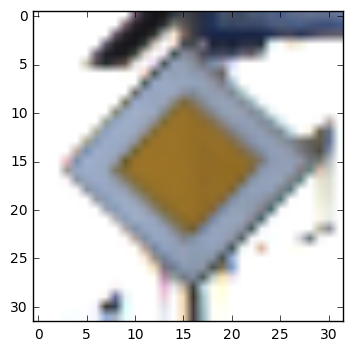

12


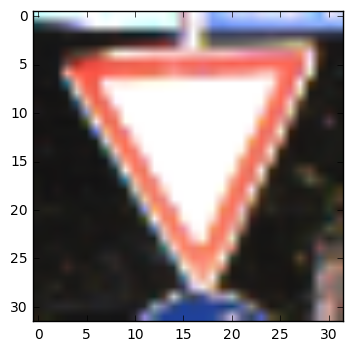

13


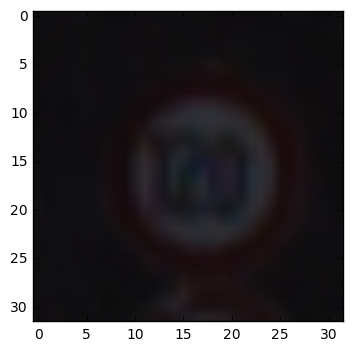

8


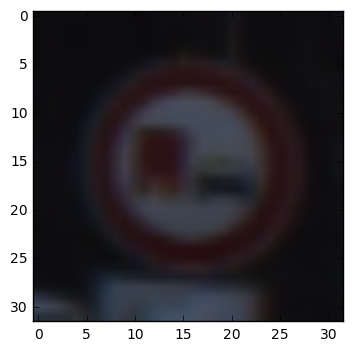

10


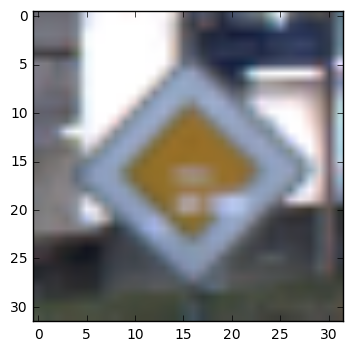

12


In [8]:
plt.imshow(X_train_inputs[500,:,:,:])
plt.show()
print(y_train[500])

plt.imshow(X_train_inputs[15000,:,:,:])
plt.show()
print(y_train[15000])

plt.imshow(X_train_inputs[21000,:,:,:])
plt.show()
print(y_train[21000])

plt.imshow(X_train_inputs[25600,:,:,:])
plt.show()
print(y_train[25600])

plt.imshow(X_train_inputs[33100,:,:,:])
plt.show()
print(y_train[33100])

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:** For now, I've just split up the training data into training and validation sets. There are 3 times more items in the training set than in the validation set. I also reshape the image data into a (32,32,1) shape for input to the CNN network.

In [9]:
# Define you architecture here
import tensorflow as tf

image_sizeX = 32
image_sizeY = 32
num_channels = 3 # grayscale
num_labels = 43  

epochs = 10
batch_size = 128
patch_size = 5
features1 = 16
features2 = 36
hidden_layer1_size =  128
dropout_keep_prob = 0.5
use_cnn = True
use_regularization = True
reg_beta = 0.01
use_learning_rate_decay = False
use_dropout = False
initial_learning_rate = 0.002

graph = tf.Graph()
with graph.as_default():
    
    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=[None, image_sizeX, image_sizeY, num_channels])
    tf_train_labels = tf.placeholder(tf.float32, shape=[None, num_labels])
    tf_valid_dataset =  tf.placeholder(tf.float32, shape=[None, image_sizeX, image_sizeY, num_channels])
    tf_test_dataset = tf.placeholder(tf.float32, shape=[None, image_sizeX, image_sizeY, num_channels])
      
    # Variables.
    cnn_layer1_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, features1]))
    cnn_layer1_weights = tf.get_variable("cnn_layer1_weights", 
                                            shape = [patch_size, patch_size, num_channels, features1],
                                            initializer=tf.contrib.layers.xavier_initializer())
    cnn_layer2_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, features1, features2]))
    cnn_layer2_weights = tf.get_variable("cnn_layer2_weights", 
                                        shape = [patch_size, patch_size, features1, features2],
                                        initializer=tf.contrib.layers.xavier_initializer())

    weights_fcnn_h1 = tf.Variable(tf.truncated_normal([int(image_sizeX/2 * image_sizeY/2 * features2), hidden_layer1_size]))
    weights_fcnn_h1 = tf.get_variable("weights_fcnn_h1", 
                                        shape = [int(image_sizeX/2 * image_sizeY/2 * features2), hidden_layer1_size], 
                                        initializer=tf.contrib.layers.xavier_initializer())
    weights_fcnn_o = tf.Variable(tf.truncated_normal([hidden_layer1_size, num_labels]))
    weights_fcnn_o = tf.get_variable("weights_fcnn_o", 
                                        shape = [hidden_layer1_size, num_labels], 
                                        initializer=tf.contrib.layers.xavier_initializer())


    cnn_layer1_biases = tf.Variable(tf.zeros([features1]))
    cnn_layer2_biases = tf.Variable(tf.constant(1.0, shape=[features2]))
    biases_fcnn_h1 = tf.Variable(tf.constant(1.0, shape=[hidden_layer1_size]))
    biases_fcnn_o = tf.Variable(tf.constant(1.0, shape=[num_labels]))
        
    keep_prob = tf.placeholder(tf.float32)

    # CNN piece
    def cnn_model(data):
        conv1 = tf.nn.conv2d(data, cnn_layer1_weights, [1, 1, 1, 1], padding='SAME')
        hidden1 = tf.nn.relu(conv1 + cnn_layer1_biases)
        conv2 = tf.nn.conv2d(hidden1, cnn_layer2_weights, [1, 1, 1, 1], padding='SAME')
        hidden2 = tf.nn.relu(conv2 + cnn_layer2_biases)
        pooling2 = tf.nn.max_pool(hidden2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
        shape = pooling2.get_shape().as_list()
        dim = np.prod(shape[1:])
        return tf.reshape(pooling2, [-1, dim])
    
    # FC_NN piece
    def fcnn_model(data):
        hidden1_fcnn = tf.nn.relu(tf.matmul(data, weights_fcnn_h1) + biases_fcnn_h1)
        if use_dropout:
            hidden1_drop_fcnn = tf.nn.dropout(hidden1_fcnn, keep_prob)
        else:
            hidden1_drop_fcnn = hidden1_fcnn

        return tf.matmul(hidden1_drop_fcnn, weights_fcnn_o) + biases_fcnn_o
    
    # Full network
    def full_model(data):   
        cnn_data = cnn_model(data)
        pred = fcnn_model(cnn_data)
        return pred

    # Instanciate the model
    logits_pred = full_model(tf_train_dataset)

    loss = tf.nn.softmax_cross_entropy_with_logits(logits_pred, tf_train_labels)

    if use_regularization:
        loss += reg_beta*tf.nn.l2_loss(cnn_layer1_weights) + \
                reg_beta*tf.nn.l2_loss(cnn_layer2_weights) + \
                reg_beta*tf.nn.l2_loss(weights_fcnn_h1) + \
                reg_beta*tf.nn.l2_loss(weights_fcnn_o) 

    loss = tf.reduce_mean(loss)
    
    # Optimizer.
    optimizer = tf.train.AdamOptimizer(initial_learning_rate).minimize(loss)
      
    # Predictions for the training, validation, and test data.
    train_predictions = tf.nn.softmax(logits_pred)
    valid_predictions = full_model(tf_valid_dataset)       
    test_predictions = full_model(tf_test_dataset)
    
    saver = tf.train.Saver()


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** Since CNNs are widely used in image classification problems, I decided to implement a CNN followed by a fully connected neural network layer to solve the traffic sign recognition problem. 

I have created a 2 layer CNN followed by a 2 layer fully-connected neural network. The CNN takes as input an array of (32,32,3) images. The first layer extracts 16 features from these images, resulting in a (32,32,16) volume. This is fed into another convolution layer which extracts 36 features, resulting in a (32, 32, 36) volume. I then feed this into a max pooling layer which compresses the spatial dimension by 2, resulting in a (16,16,36) volume. I then re-shape this output and feed it as a single vector into the FC-NN.

The fully connected neural network has one layer which is 128 wide. This layer then connects to a softmax classifier which is the same width as the number of types of traffic signs in the dataset, i.e. 43. I also implemented dropout in the FCNN stage. 

Finally, I use regularization in the loss calculation in order to minimize the weights, and I use the AdamOptimizer as this converges faster than the GradientDescentOptimizer.

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.
def accuracy(predictions, labels):
    return 1.0 * (np.sum(np.argmax(predictions, 1) == np.argmax(labels,1)) / predictions.shape[0])

    
import math
from tqdm import tqdm
import time

log_batch_step = 100
    
# Train the model        
start = time.time()
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

save_path = "/tmp/SignModel"

with tf.Session(graph=graph) as session:
    # This is a one-time operation which ensures the parameters get initialized as
    # we described in the graph: random weights for the matrix, zeros for the biases. 
    tf.initialize_all_variables().run()
    batch_count = int(math.ceil(len(train_dataset)/batch_size))
    batch_count_val = int(math.ceil(len(valid_dataset)/batch_size))
    batch_count_test = int(math.ceil(len(test_dataset)/batch_size))

    for epoch_i in range(epochs):
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')

        # The training cycle
        for batch_i in batches_pbar:
            # Generate a minibatch.
            batch_start = batch_i * batch_size
            batch_data = train_dataset[batch_start:batch_start + batch_size, :]
            batch_labels = train_labels[batch_start:batch_start + batch_size, :]
            # Prepare a dictionary telling the session where to feed the minibatch.
            feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob: dropout_keep_prob}
            # Run the optimizer adn get loss and predictions
            #print("batch_i {} batch_data.shape {} batch_labels.shape {}".format(batch_i, batch_data.shape, batch_labels.shape))
            _, l, prediction = session.run([optimizer, loss, train_predictions], feed_dict=feed_dict)
            # Log every certain number of batches
            if not batch_i % log_batch_step:
                batch_acc = accuracy(prediction, batch_labels)
                valid_acc = 0.
                for batch_v in range(batch_count_val):
                    batch_start_v = batch_v * batch_size
                    batch_data_v = valid_dataset[batch_start_v:batch_start_v + batch_size, :]
                    batch_labels_v = valid_labels[batch_start_v:batch_start_v + batch_size, :]
                    # Prepare a dictionary telling the session where to feed the minibatch.
                    feed_dict = {tf_valid_dataset : batch_data_v, keep_prob: 1.0}
                    # Run a batch of validation samples
                    valid_acc += accuracy(session.run(valid_predictions,feed_dict=feed_dict), batch_labels_v)
                valid_acc /= batch_count_val

                #print("prediction[0] : {}".format(prediction[0]))
                #print("labels[0] : {}".format(batch_labels[0]))
                #print("prediction : {}".format(prediction))
                #print("labels : {}".format(batch_labels))
                #print("batch_acc {}".format(batch_acc))
                #print("valid_acc {}".format(valid_acc))
                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(batch_acc)
                valid_acc_batch.append(valid_acc)                
        print("Loss after epoch {} is {}".format(epoch_i+1, l))

    # Check model accuracy against test set
    test_acc = 0.
    for batch_t in range(batch_count_test):
        batch_start_t = batch_t * batch_size
        batch_data_t = test_dataset[batch_start_t:batch_start_t + batch_size, :]
        batch_labels_t = test_labels[batch_start_t:batch_start_t + batch_size, :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        feed_dict = {tf_test_dataset : batch_data_t, keep_prob: 1.0}
        # Run a batch of validation samples
        test_acc += accuracy(session.run(test_predictions,feed_dict=feed_dict), batch_labels_t)
    test_acc /= batch_count_test

    print('Test accuracy: {}'.format(test_acc))
    end = time.time()
    print("Time taken to train database : {} seconds".format(end - start))
    
    # Save the model
    saver.save(sess=session, save_path=save_path)


Epoch  2/10:   0%|          | 0/230 [00:00<?, ?batches/s]

Loss after epoch 1 is 3.961376667022705


Epoch  3/10:   0%|          | 0/230 [00:00<?, ?batches/s]

Loss after epoch 2 is 2.8163721561431885


Epoch  4/10:   0%|          | 0/230 [00:00<?, ?batches/s]

Loss after epoch 3 is 1.3493376970291138


Epoch  5/10:   0%|          | 0/230 [00:00<?, ?batches/s]

Loss after epoch 4 is 0.9852682948112488


Epoch  6/10:   0%|          | 0/230 [00:00<?, ?batches/s]

Loss after epoch 5 is 0.906039297580719


Epoch  7/10:   0%|          | 0/230 [00:00<?, ?batches/s]

Loss after epoch 6 is 0.7618539929389954


Epoch  8/10:   0%|          | 0/230 [00:00<?, ?batches/s]

Loss after epoch 7 is 0.6822413802146912


Epoch  9/10:   0%|          | 0/230 [00:00<?, ?batches/s]

Loss after epoch 8 is 0.6142480969429016


Epoch 10/10:   0%|          | 0/230 [00:00<?, ?batches/s]

Loss after epoch 9 is 0.5923206210136414


Epoch 10/10: 100%|██████████| 230/230 [05:27<00:00,  1.03batches/s]


Loss after epoch 10 is 0.575198769569397
Test accuracy: 0.8535445295983086
Time taken to train database : 2533.388650417328 seconds


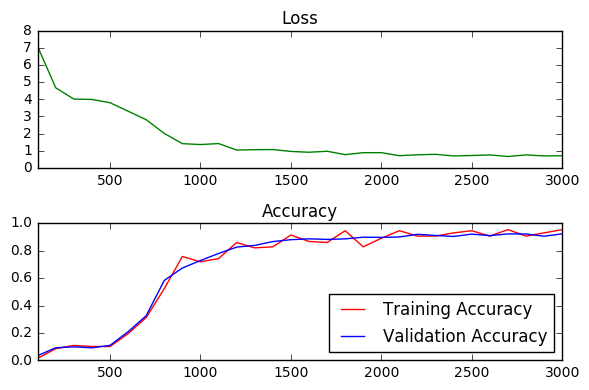

In [11]:
# Let's take a look at how well the model performs
  
# Print graphs
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I trained my model using the AdamOptimizer as this converges faster than the GradientDescentOptimizer. I also used a batch size of 128, and trained the model over 10 epochs. For hyper=parameters, I used:

batch_size = 128
patch_size = 5
depth = 16
hidden_layer1_size =  1024
hidden_layer2_size =  512
dropout_keep_prob = 0.5
reg_beta = 0.01
initial_learning_rate = 0.002

You can see from the graphs above that the loss has pretty much converged to 0.6 after the 10 epochs. Also, the training and validaton accuracys have converged to about 90%.

Interestingly, the test validation is a little lower, coming in at 83%. I'm not sure why the test dataset is 7% lower, but it suggests some differences between it and the training/validation sets. To debug this, I think I'd have to visually compare a large set of the images to see if there are differences. 


### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:** First off, since this is an object classification task using a labelled dataset, it narrowed the task down to using something like an SVM, Decision Tree, Neural Network, or CNN, as opposed to something like linear regression. 

I decided to use CNN for a number of reasons:

1/ Using neural networks I can solve many problems without finding and describing method of such problem solving, without building algorithms by myself, without developing programs, even without any case of my personal knowledge about the nature of solved problem. I must only have some examples of similar tasks with good solutions. I

2/ CNNs have been used before for image recognition challenges. In fact, since 2012, a CNN-type network has performed best at the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), which is a benchmark of image classification detection, with millions of images and hundreds of image classes. Since traffic sign recognition is a very similiar challenge, it makes sense to use a CNN as the founcadtional network.

3/ CNNs have the property of translation invariance, where they can recognize objects in an image regaress of the object position. This is ideal (and needed) for traffic sign recogntion, as the signs will not always be in one place in the test images.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

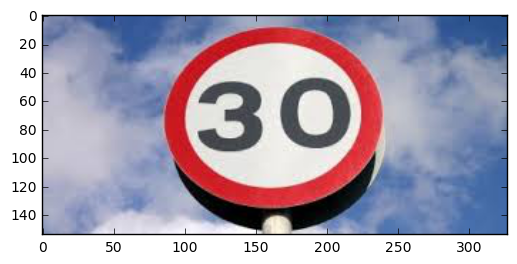

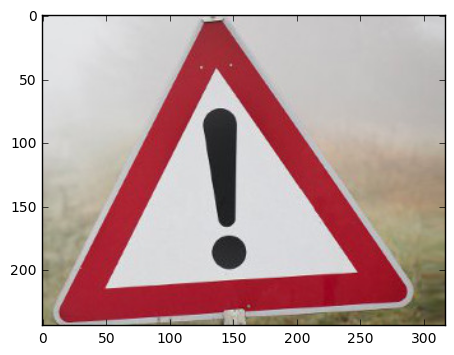

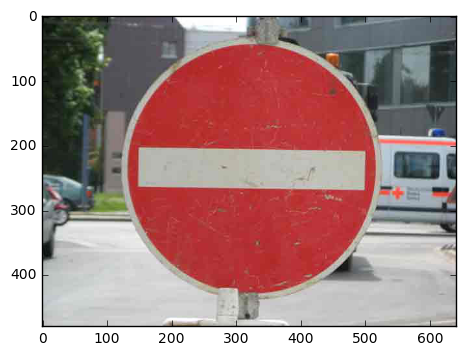

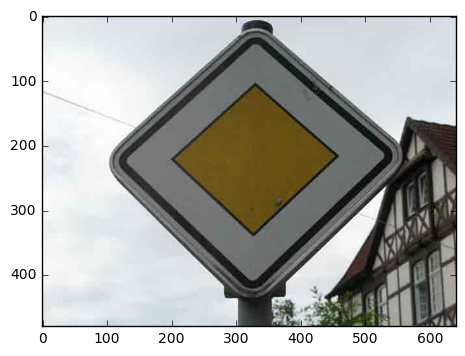

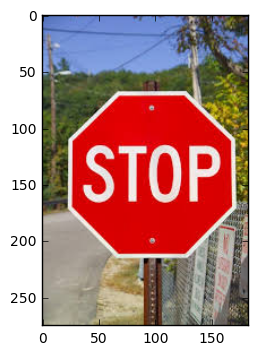

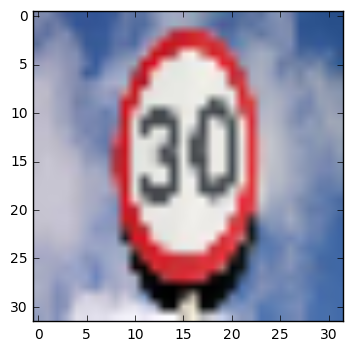

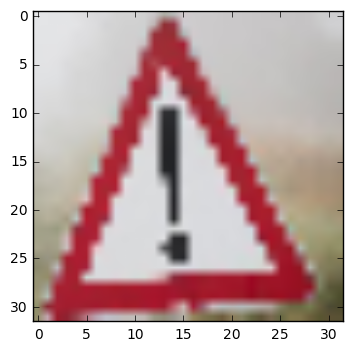

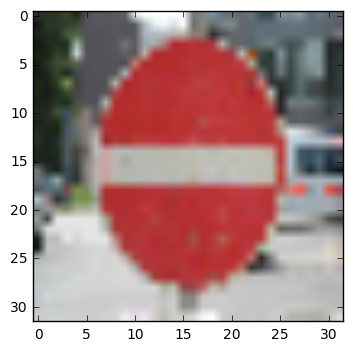

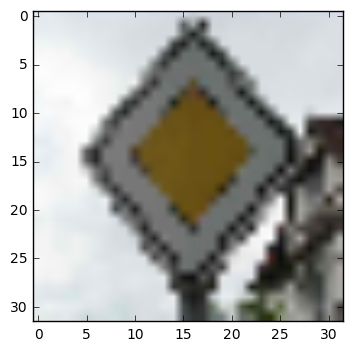

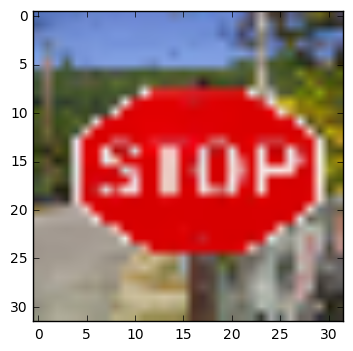

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

def input_img(filename):
    color_img = cv2.imread(filename)
    color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(color_img)
    plt.show()
    
    normed_img = normalize_data(color_img)
    resizedImg = cv2.resize(normed_img, (32, 32))
    
    avg_red_pix_rows = np.mean(resizedImg[:,:,0], axis=0)
    avg_red_pix_val = int(np.mean(avg_red_pix_rows, axis=0))
    avg_green_pix_rows = np.mean(resizedImg[:,:,1], axis=0)
    avg_green_pix_val = int(np.mean(avg_green_pix_rows, axis=0))
    avg_blue_pix_rows = np.mean(resizedImg[:,:,2], axis=0)
    avg_blue_pix_val = int(np.mean(avg_blue_pix_rows, axis=0))
    resizedImg[:,:,0] -= avg_red_pix_val
    resizedImg[:,:,1] -= avg_green_pix_val
    resizedImg[:,:,2] -= avg_blue_pix_val
    return resizedImg

img1 = input_img("./30speed.jpeg")
img2 = input_img("./Caution.jpg")
img3 = input_img("./Do-Not-Enter.jpg")
img4 = input_img("./PriorityRoad.jpg")
img5 = input_img("./stop.jpeg")

# Lets look at the images now after pre-processing
plt.imshow(img1)
plt.show()
    
plt.imshow(img2)
plt.show()

plt.imshow(img3)
plt.show()

plt.imshow(img4)
plt.show()

plt.imshow(img5)
plt.show()

In [13]:
img1

array([[[ 0.50083678,  0.53829657,  0.67203968],
        [ 0.48382353,  0.53872549,  0.68382353],
        [ 0.37483341,  0.44203431,  0.62349494],
        ..., 
        [ 0.1682598 ,  0.32120098,  0.55257353],
        [ 0.16047986,  0.31342103,  0.54479358],
        [ 0.15294118,  0.30588235,  0.5372549 ]],

       [[ 0.47714844,  0.52334559,  0.67150352],
        [ 0.38939951,  0.45386029,  0.62028186],
        [ 0.44161497,  0.49480124,  0.66061006],
        ..., 
        [ 0.17536765,  0.32830882,  0.55968137],
        [ 0.16403186,  0.31697304,  0.54834559],
        [ 0.16078431,  0.31372549,  0.54509804]],

       [[ 0.42042165,  0.4739411 ,  0.64522059],
        [ 0.37759268,  0.44818091,  0.63578431],
        [ 0.48496285,  0.52398323,  0.66308785],
        ..., 
        [ 0.19215686,  0.34509804,  0.57647059],
        [ 0.1778799 ,  0.33082108,  0.56219363],
        [ 0.16750728,  0.32044845,  0.551821  ]],

       ..., 
       [[ 0.65545343,  0.67506127,  0.75827206],
        

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:** I've chosen the above 5 images to test. You can see both the original and the pre-processed versions of them above. I think all of these should be good candidates for classification as they are German road signs, so should match the shapes/colors of the training dataset. They are alos un-obstructed, and there is not much else in the images other than the signs, so nothing that could confuse the classifictaion model.

In [17]:
def get_prediction(img1):
    with tf.Session(graph=graph) as session:
        # Restore vairables
        saver.restore(sess=session, save_path=save_path)
        img1_tensor = tf.convert_to_tensor(img1)
        img1_tensor = tf.reshape(img1_tensor, (1, 32, 32,3 ))
        img1_tensor = tf.cast(img1_tensor, tf.float32)

        logits = full_model(img1_tensor)

        logits = tf.nn.softmax(logits)
        pred = session.run(logits, feed_dict={keep_prob:1.0})
        best_preds, best_indices = tf.nn.top_k(pred, k=5)
        best_preds, best_indices  = session.run([best_preds, best_indices])
        
        print("Top Predictions {}".format(best_indices))
        return pred, best_preds, best_indices

print("Image 1 - 30 speed limit")
p1, bp1, bi1 = get_prediction(img1)
print("\nImage 2 - Caution")
p2, bp2, bi2 = get_prediction(img2)
print("\nImage 3 - Do Not Enter")
p3, bp3, bi3 = get_prediction(img3)
print("\nImage 4 - Priority Road")
p4, bp4, bi4 = get_prediction(img4)
print("\nImage 5 - Stop Sign")
p5, bp5, bi5 = get_prediction(img5)

Image 1 - 30 speed limit
Top Predictions [[1 0 7 4 5]]

Image 2 - Caution
Top Predictions [[18 26 24 22 27]]

Image 3 - Do Not Enter
Top Predictions [[17 14  0 22  1]]

Image 4 - Priority Road
Top Predictions [[12 18 38 15 13]]

Image 5 - Stop Sign
Top Predictions [[14 17  4  0 13]]


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:** The model correctly predicted all 5 of the road signs!

For image 1, a 30 Speed Limit sign, the model predicted these as a top 5:
    1. Speed Limit 30
    2. Speed Limit 20
    3. Speed Limit 80
    4. Speed Limit 50
    5. Speed Limit 60
    
    It got this one correct!

For image 2, a Caution sign, the model predicted these as a top 5:
    1. General Caution
    2. Traffic Signals
    3. Road Narrows in right
    4. Bumpy Road
    5. Pedestrians
    
    It got this one correct!
    
For image 3, a Do Not Enter sign, the model predicted these as a top 5:
    1. No Entry
    2. Stop
    3. Speed Limit 20
    4. Bumpy Road
    5. Speed Limit 30
    
    It got this one correct!
    
For image 4, a Priority Road sign, the model predicted these as a top 5:
    1. Priority Road
    2. General Caution
    3. Keep Right
    4. No Vehicles
    5. Yield
    
    It got this one correct!
        
For image 5, a Stop sign, the model predicted these as a top 5:
    1. Stop
    2. No Entry
    3. Speed Limit 70
    4. Speed Limit 20
    5. Yield
    
    It got this one correct!

In [18]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

print("Softmax Probabilities for Sign 1 : Speed Limit 30 :")
#print(p1)
print("Best Indices {}".format(bi1))
print("Best Predictions {}".format(bp1))

print("\nSoftmax Probabilities for Sign 2 : Caution :")
#print(p2)
print("Best Indices {}".format(bi2))
print("Best Predictions {}".format(bp2))

print("\nSoftmax Probabilities for Sign 3 : Do Not Enter :")
#print(p3)
print("Best Indices {}".format(bi3))
print("Best Predictions {}".format(bp3))

print("\nSoftmax Probabilities for Sign 4 : Priority Road :")
#print(p4)
print("Best Indices {}".format(bi4))
print("Best Predictions {}".format(bp4))

print("\nSoftmax Probabilities for Sign 5 : Stop Sign :")
#print(p5)
print("Best Indices {}".format(bi5))
print("Best Predictions {}".format(bp5))

Softmax Probabilities for Sign 1 : Speed Limit 30 :
Best Indices [[1 0 7 4 5]]
Best Predictions [[  8.18542361e-01   1.47702053e-01   3.12503278e-02   1.63645553e-03
    4.44158388e-04]]

Softmax Probabilities for Sign 2 : Caution :
Best Indices [[18 26 24 22 27]]
Best Predictions [[ 0.91648638  0.07399187  0.0057041   0.00200232  0.00156572]]

Softmax Probabilities for Sign 3 : Do Not Enter :
Best Indices [[17 14  0 22  1]]
Best Predictions [[  9.99823511e-01   1.67802413e-04   7.18841693e-06   4.95085828e-07
    4.78905463e-07]]

Softmax Probabilities for Sign 4 : Priority Road :
Best Indices [[12 18 38 15 13]]
Best Predictions [[  9.99964118e-01   1.72440741e-05   1.51995227e-05   1.55955422e-06
    1.06049924e-06]]

Softmax Probabilities for Sign 5 : Stop Sign :
Best Indices [[14 17  4  0 13]]
Best Predictions [[  9.90699947e-01   7.84281641e-03   7.92115985e-04   2.47154094e-04
    2.23244657e-04]]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:** We can see the following:
an 
Sign 1 is 81.8% sure that the sign is of type 1, which is a Speed Limit 30 (correct). It thinks there is an 14.7% chance that this is a Speed Limit 20 sign. This is a very close match visually, so it's understandable that it thinks this is the next most likely candidate.

Sign 2 is 91.6% sure that the sign is of type 18, which is a General Caution sign (correct). 

Sign 3 is 99.9% sure that the sign is of type 17, which is a No Entry sign (correct).

Sign 4 is 99.9% sure that the sign is of type 12, which is a Priority Road sign (correct)

Sign 5 is 99.0% sure that the sign is of type 14, which is a Stop sign (correct). 

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:** N/A

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.